In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [7]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [10]:

datagen.fit(x_train)

In [11]:
model = models.Sequential()

In [12]:
model = models.Sequential()

# Input Layer
model.add(layers.Input(shape=(32,32,3)))

# First Conv Block
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Second Conv Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Third Conv Block
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=6,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 124ms/step - accuracy: 0.2370 - loss: 2.0185 - val_accuracy: 0.4553 - val_loss: 1.5127
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.4281 - loss: 1.5732 - val_accuracy: 0.5308 - val_loss: 1.2756
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.4858 - loss: 1.4268 - val_accuracy: 0.5734 - val_loss: 1.1879
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.5179 - loss: 1.3478 - val_accuracy: 0.6019 - val_loss: 1.1209
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.5454 - loss: 1.2862 - val_accuracy: 0.6239 - val_loss: 1.0580
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.5558 - loss: 1.2494 - val_accuracy: 0.6288 - val_loss: 1.0342


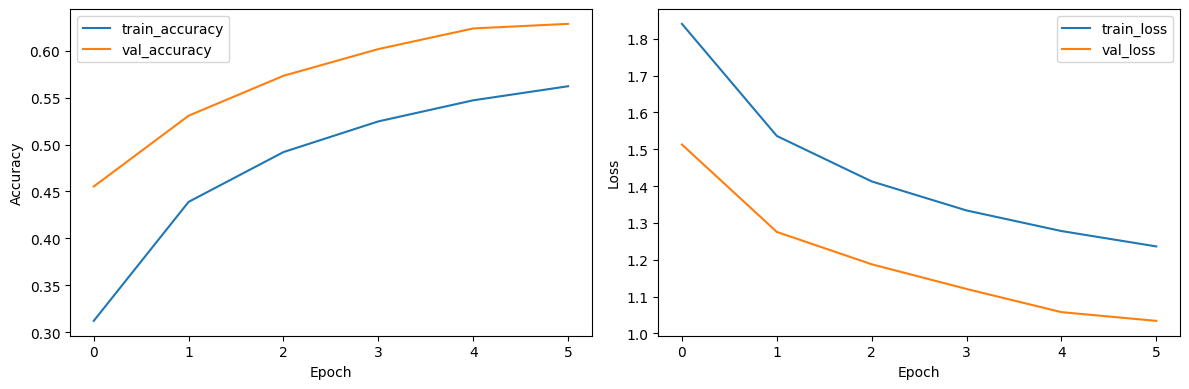

In [17]:
history = model.history.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="train_accuracy")
plt.plot(history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()